## IST 718 Lab 1
### Bing-Je Wu
The research question is, how can we recommend the **best salary (total compensation, minus bonus)** for our next head football coach?


* Start with the data Coaches.
* Review the data—clean as appropriate.
* Consider the base worksheet and the additional data.
    + Stadium size
    + Graduation rate:
* Available from http://fs.ncaa.org/Docs/newmedia/public/rates/index.html
* Use the 2006 cohort and include both GSR and FGR
    + Annual donations to program (if available)
* Develop an additional vector for each school using last year’s record.
* Build a data frame for your analysis.
* Conduct an initial data analysis.
* Fit a regression model with the salary as the response and the relevant predictors (i.e., you will need more than one predictor).  
  
  
* Answer the following questions in your report:
    + What is the recommended salary for the Syracuse football coach?
    + What would his salary be if we were still in the Big East? What if we went to the Big Ten?
    + What schools did we drop from our data, and why?
    + What effect does graduation rate have on the projected salary?
    + How good is our model?
    + What is the single biggest impact on salary size?  
    
    
* Bonus:
    + Develop a geographic visualization that in your view best depicts the conferences’ median salary.
    + Fit a hierarchical model based on conference.  
    
    
* Double bonus:
    + Using some additional materials — https://apsportal.ibm.com/analytics — recreate your code for the basic regression model with a training and test set, but do not use conference as a predictor.

Glossary:   
graduation success rate (GSR)  
federal graduation rate (FGR)   
PF = number of points scored by the franchise, throughout the season  
PA = number of points scored against the franchise, throughout the season  

Datasets:
 1. Coaches9 
 https://github.com/2SUBDA/IST_718/blob/master/Coaches9.csv
 2. football_stadium
 https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums
 3. 2006 Cohort 2012-2013 Year 
 https://web3.ncaa.org/aprsearch/gsrsearch
 4. Division_I
 https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_institutions
 5. 2019_record
 https://www.ncaa.com/standings/football/fbs

* Outline:
    + Load the dataset
    + Explore the datasets
        1. Coaches9 dataset
            + Normalization
            + Dealing with missing values
            + Feature re-engineering
        2. Football_stadium dataset
        3. ncaa_2006_cohort dataset
        4. Division_I dataset
        5. 2019_record dataset
        6. Combined dataset
            + merged1: Coaches9 dataset inner join with Division_I dataset
            + merged2: merged1 left join with ncaa_2006_cohort dataset
            + merged3: merged2 left join with 2019_record dataset
            + merged4: merged3 left join with football_stadium dataset
            + Dealing with missing values
    * Statistics Analysis
    * Model selection
    * Final Model
    * Questions
    * Conclusion

## Load the data set

#### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set maximum rows display at 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
# magic command
%matplotlib inline    
import seaborn as sns
import statistics
# regular expression for str manipulation
import re 

#### Read data

In [2]:
df=pd.read_csv('Coaches9.csv')
df_stadium=pd.read_csv('football_stadium.csv')
df_cohort=pd.read_csv('ncaa_2006_cohort.csv')
df_divisionI=pd.read_csv('divisionI.csv')
df_record=pd.read_csv('2019_record.csv')

## Explore the datasets

### - Coaches9 dataset -

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
School          129 non-null object
Conference      129 non-null object
Coach           129 non-null object
SchoolPay       129 non-null object
TotalPay        129 non-null object
Bonus           129 non-null object
BonusPaid       129 non-null object
AssistantPay    129 non-null object
Buyout          129 non-null object
dtypes: object(9)
memory usage: 9.2+ KB


In [4]:
df.describe()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,129,129,129,129,129,129,129,129,129
unique,129,11,129,104,105,85,51,1,102
top,Middle Tennessee,SEC,Mike MacIntyre,"$3,500,000","$3,500,000",--,--,$0,--
freq,1,14,1,5,5,22,41,129,22


In [5]:
df

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
5,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000"
6,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667"
7,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000"
8,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
9,Army,Ind.,Jeff Monken,932521,932521,--,--,$0,--


#### Normalization:

Problems need to be solved:
    1. '--' should be replaced as 0
    2. remove '$' sign and ',' 

In [6]:
def normalize_number(strings):
    """
    Expect: a string contain '$','--', or ','
    Modifies: remove '$' and ','; convert '--' to '0'
    Returns: an float
    """
    if strings != '--':
        if '$' in strings:
            strings=strings.replace('$','')
            if ',' in strings:
                strings=strings.replace(',','',3)
    else:
        strings=0
    return float(strings)

In [7]:
normalized_list=['SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout']
# df[normalized_list]=df[normalized_list].applymap(normalized_number)
for l in normalized_list:
    df[l]=df[l].apply(normalize_number)
print('Normalization has been complete!')

Normalization has been complete!


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
School          129 non-null object
Conference      129 non-null object
Coach           129 non-null object
SchoolPay       129 non-null float64
TotalPay        129 non-null float64
Bonus           129 non-null float64
BonusPaid       129 non-null float64
AssistantPay    129 non-null float64
Buyout          129 non-null float64
dtypes: float64(6), object(3)
memory usage: 9.2+ KB


SchoolPay is going to be used as the dependent variable:
1. Check number of record has SchoolPay == 0
2. Check those missing values and decide what to do with those missing records
Bonus and BounsPaid is going to be converted as SuccessRate=(BounsPaid/Bonus)
1. Check number of record has BounsPaid == 0 or Bonus==0
2. Check those missing values and decide what to do with those missing records

In [9]:
df[df['SchoolPay']==0]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
12,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0,0.0,0.0,0.0
16,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0,0.0,0.0,0.0
91,Rice,C-USA,Mike Bloomgren,0.0,0.0,0.0,0.0,0.0,0.0
99,Southern Methodist,AAC,Sonny Dykes,0.0,0.0,0.0,0.0,0.0,0.0


There are four records having missing values for entire row (stats).  
Because it could not contribute on SchoolPay prediction, those 4 records (Baylor, Brigham Young, Rice, Southern Methodist) will be dropped from the dataset.  

One record has 0 on Bouns but has 290000 on BonusPaid, considering SuccessRate == 100.  

In [10]:
df = df[(df['School']!='Baylor') & (df['School']!='Brigham Young') 
   & (df['School']!='Rice') & (df['School']!='Southern Methodist')]
print('4 records (Baylor, Brigham Young, Rice, Southern Methodist) has been dropped') 

4 records (Baylor, Brigham Young, Rice, Southern Methodist) has been dropped


In [11]:
df[df['Bonus']==0]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
9,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,0.0,0.0,0.0
14,Boston College,ACC,Steve Addazio,2514859.0,2514859.0,0.0,0.0,0.0,0.0
28,Duke,ACC,David Cutcliffe,2540928.0,2540928.0,0.0,0.0,0.0,0.0
50,Liberty,Ind.,Turner Gill,947281.0,947281.0,0.0,0.0,0.0,0.0
60,Miami (Fla.),ACC,Mark Richt,4058061.0,4058061.0,0.0,0.0,0.0,0.0
69,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,0.0,0.0,0.0
79,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,3619775.0,0.0,0.0,0.0,0.0
80,Notre Dame,Ind.,Brian Kelly,2129638.0,2129638.0,0.0,0.0,0.0,0.0
89,Pittsburgh,ACC,Pat Narduzzi,3017718.0,3017718.0,0.0,0.0,0.0,0.0
98,Southern California,Pac-12,Clay Helton,2625965.0,2625965.0,0.0,0.0,0.0,0.0


#### Feature re-engineering:

In [12]:
# Add new feature of SuccessRate(BounsPaid/Bonus)
SuccessRate = list()
for t,f in df[['Bonus', 'BonusPaid']].iterrows():
    # if 'Bonus'==0 and 'BonusPaid'==0
    if (f[0] == 0) & (f[1] == 0):
        # SuccessRate == 0
        SuccessRate.append(0)
    # if 'Bonus'==0 and 'BonusPaid'!=0
    elif (f[0] == 0) & (f[1] != 0):
        # SuccessRate == 100
        SuccessRate.append(100)
    else:
        # (BounsPaid/Bonus)
        SuccessRate.append(f[1]/f[0]) 
df=df.assign(SuccessRate = SuccessRate)
print('New feature "SuccessRate" has been added')

New feature "SuccessRate" has been added


In [13]:
df[df['Buyout']==0]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SuccessRate
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,0.0
9,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,0.0,0.0,0.0,0.0
14,Boston College,ACC,Steve Addazio,2514859.0,2514859.0,0.0,0.0,0.0,0.0,0.0
28,Duke,ACC,David Cutcliffe,2540928.0,2540928.0,0.0,0.0,0.0,0.0,0.0
50,Liberty,Ind.,Turner Gill,947281.0,947281.0,0.0,0.0,0.0,0.0,0.0
60,Miami (Fla.),ACC,Mark Richt,4058061.0,4058061.0,0.0,0.0,0.0,0.0,0.0
66,Mississippi,SEC,Matt Luke,3000000.0,3000000.0,1550000.0,0.0,0.0,0.0,0.0
67,Mississippi State,SEC,Joe Moorhead,2600000.0,2600000.0,1350000.0,0.0,0.0,0.0,0.0
69,Navy,AAC,Ken Niumatalolo,2163000.0,2163000.0,0.0,0.0,0.0,0.0,0.0
79,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,3619775.0,0.0,0.0,0.0,0.0,0.0


There are 20 records have missing values on 'Buyout' column.  
Use the median by each conference to replace the missing values.  
The step is going to be performed at "Combined dataset" section.  

### - Football_stadium dataset -

In [14]:
df_stadium

,Stadium,City,State,Team,Conference,Capacity
0,Aggie Memorial Stadium,Las Cruces,NM,New Mexico State,Independent,30343
1,Alamodome,San Antonio,TX,UTSA,C-USA,65000
2,Alaska Airlines Field at Husky Stadium,Seattle,WA,Washington,Pac-12,70500
3,Albertsons Stadium,Boise,ID,Boise State,Mountain West,36387
4,Allen E. Paulson Stadium,Statesboro,GA,Georgia Southern,Sun Belt,25000
5,Aloha Stadium,Honolulu,HI,Hawaiʻi,Mountain West,50000
6,Alumni Stadium,Chestnut Hill,MA,Boston College,ACC,44500
7,Amon G. Carter Stadium,Fort Worth,TX,TCU,Big 12,45000
8,Apogee Stadium,Denton,TX,North Texas,C-USA,30850
9,Arizona Stadium,Tucson,AZ,Arizona,Pac-12,56029


In [15]:
df_stadium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
Stadium       130 non-null object
City          130 non-null object
State         130 non-null object
Team          130 non-null object
Conference    130 non-null object
Capacity      130 non-null int64
dtypes: int64(1), object(5)
memory usage: 6.2+ KB


### - ncaa_2006_cohort dataset -

In [16]:
df_cohort

,Cohort Year,School,Conference,Sport,State,GSR,FGR
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52.0
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45.0
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59.0
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57.0
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55.0
5,2006,University at Albany,Northeast Conference,Football,NY,74,57.0
6,2006,Alcorn State University,Southwestern Athletic Conf.,Football,MS,57,39.0
7,2006,Appalachian State University,Southern Conference,Football,NC,68,56.0
8,2006,Arizona State University,Pac-12 Conference,Football,AZ,67,52.0
9,2006,University of Arizona,Pac-12 Conference,Football,AZ,61,59.0


### - Division I dataset -

In [17]:
df_divisionI

,School,Common Name,Team,City,State,Type
0,Abilene Christian University,Abilene Christian,Wildcats,Abilene,Texas,Private/Churches of Christ
1,University of Akron,Akron,Zips,Akron,Ohio,State
2,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State
3,Alabama Agricultural and Mechanical University,Alabama A&M,Bulldogs and Lady Bulldogs,Huntsville,Alabama,State
4,University of Alabama at Birmingham,UAB,Blazers,Birmingham,Alabama,State
5,Alabama State University,Alabama State,Hornets and Lady Hornets,Montgomery,Alabama,State
6,"University at Albany, SUNY",Albany,Great Danes,Albany,New York,State
7,Alcorn State University,Alcorn State,Braves and Lady Braves,Lorman,Mississippi,State
8,American University,American,Eagles,Washington,District of Columbia,Private/Methodist
9,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State


### - Combined dataset -

In [18]:
# coaches data vs divisionI
# Check non-matching school name
schools_t = tuple(df['School'])
counter=0
for i,school in enumerate(schools_t):
    if school in list(df_divisionI['Common Name']):
        continue
    else:
        counter += 1
        print(f'{counter}. Index No.{i+1} "{school}" is not in the df_divisionI Common Name list.')

1. Index No.4 "Alabama at Birmingham" is not in the df_divisionI Common Name list.
2. Index No.18 "Central Florida" is not in the df_divisionI Common Name list.
3. Index No.26 "Connecticut" is not in the df_divisionI Common Name list.
4. Index No.32 "Florida International" is not in the df_divisionI Common Name list.
5. Index No.51 "Louisiana-Lafayette" is not in the df_divisionI Common Name list.
6. Index No.52 "Louisiana-Monroe" is not in the df_divisionI Common Name list.
7. Index No.57 "Massachusetts" is not in the df_divisionI Common Name list.
8. Index No.59 "Miami (Fla.)" is not in the df_divisionI Common Name list.
9. Index No.60 "Miami (Ohio)" is not in the df_divisionI Common Name list.
10. Index No.65 "Mississippi" is not in the df_divisionI Common Name list.
11. Index No.71 "Nevada-Las Vegas" is not in the df_divisionI Common Name list.
12. Index No.75 "North Carolina State" is not in the df_divisionI Common Name list.
13. Index No.96 "Southern California" is not in the df_

In [19]:
# replace the uncommon school name with the common name
df['School']=df['School'].replace('Alabama at Birmingham','UAB')
df['School']=df['School'].replace('Central Florida','UCF')
df['School']=df['School'].replace('Connecticut','UConn')
df['School']=df['School'].replace('Florida International','FIU')
df['School']=df['School'].replace('Louisiana-Lafayette','Louisiana')
df_divisionI['Common Name']=df_divisionI['Common Name'].replace('Louisiana–Monroe','Louisiana-Monroe')
df['School']=df['School'].replace('Massachusetts','UMass')
df['School']=df['School'].replace('Miami (Fla.)','Miami (FL)')
df['School']=df['School'].replace('Miami (Ohio)','Miami (OH)')
df['School']=df['School'].replace('Nevada-Las Vegas','UNLV')
df['School']=df['School'].replace('Mississippi','Ole Miss')
df['School']=df['School'].replace('North Carolina State','NC State')
df['School']=df['School'].replace('Southern California','USC')
df['School']=df['School'].replace('Southern Mississippi','Southern Miss')
df['School']=df['School'].replace('Texas Christian','TCU')
df['School']=df['School'].replace('Texas-El Paso','UTEP')
df['School']=df['School'].replace('Texas-San Antonio','UTSA')

#### # merged_inner1

In [20]:
df.shape

(125, 10)

In [21]:
# df has 125 records and merged_inner1 should have 125 records after merging
merged_inner1 = pd.merge(left=df,right=df_divisionI, left_on='School', right_on='Common Name')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner1.shape

(125, 16)

In [22]:
merged_inner1.head()

,School_x,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SuccessRate,School_y,Common Name,Team,City,State,Type
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,0.000000,United States Air Force Academy,Air Force,Falcons,Colorado Springs,Colorado,Federal academy
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,0.222222,University of Akron,Akron,Zips,Akron,Ohio,State
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,0.454545,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State
3,UAB,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,0.174180,University of Alabama at Birmingham,UAB,Blazers,Birmingham,Alabama,State
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,0.491525,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State


#### # merged_inner2

There are 4 schools do not have 2006 corhort information.  
1. University of North Carolina at Charlotte
    + 2011 corhort information was founded
    + 2012 The University of North Carolina at Charlotte Conference USA Football NC GSR:80
2. Georgia State University
    + No record was found
    + Take medium value based on the conference, Sun Belt
3. University of South Alabama
    + 2008 corhort information was founded
    + 2008	University of South Alabama	Sun Belt Conference	Football	AL	GSR:64	FGE:44    
4. University of Texas at San Antonio
    + 2008 corhort information was founded
    + 2008	University of Texas at San Antonio	Conference USA	Football	TX	GSR:86	

In [23]:
df_cohort['School']=df_cohort['School'].replace('U.S. Air Force Academy','United States Air Force Academy')
df_cohort['School']=df_cohort['School'].replace('University of Arkansas, Fayetteville','University of Arkansas')
df_cohort['School']=df_cohort['School'].replace('U.S. Military Academy','United States Military Academy')
df_cohort['School']=df_cohort['School'].replace('University at Buffalo, the State University of New York',
                                                'University at Buffalo')
#df_cohort['School']=df_cohort['School'].replace('','University of North Carolina at Charlotte')
# 2011	The University of North Carolina at Charlotte	Conference USA	Football	NC	100
df_cohort['School']=df_cohort['School'].replace('University of Colorado, Boulder','University of Colorado Boulder')
#df_cohort['School']=df_cohort['School'].replace('','Georgia State University')
# no record
df_cohort['School']=df_cohort['School'].replace('University of Hawaii, Manoa','University of Hawaii at Manoa')
df_cohort['School']=df_cohort['School'].replace('University of Illinois Urbana-Champaign',
                                                'University of Illinois at Urbana–Champaign')
df_cohort['School']=df_cohort['School'].replace('Indiana University, Bloomington','Indiana University')
df_cohort['School']=df_cohort['School'].replace('University of Louisiana Monroe','University of Louisiana at Monroe')
df_cohort['School']=df_cohort['School'].replace('University of Massachusetts, Amherst','University of Massachusetts Amherst')
df_cohort['School']=df_cohort['School'].replace('University of Miami (Florida)','University of Miami')
df_cohort['School']=df_cohort['School'].replace('Miami University (Ohio)','Miami University')
df_cohort['School']=df_cohort['School'].replace('University of Minnesota, Twin Cities','University of Minnesota')
df_cohort['School']=df_cohort['School'].replace('University of Missouri, Columbia','University of Missouri')
df_cohort['School']=df_cohort['School'].replace('U.S. Naval Academy','United States Naval Academy')
df_cohort['School']=df_cohort['School'].replace('University of Nebraska, Lincoln','University of Nebraska–Lincoln')
df_cohort['School']=df_cohort['School'].replace('University of North Carolina, Chapel Hill',
                                                'University of North Carolina at Chapel Hill')
df_cohort['School']=df_cohort['School'].replace('Oklahoma State University','Oklahoma State University–Stillwater')
df_cohort['School']=df_cohort['School'].replace('Rutgers, The State University of New Jersey, New Brunswick',
                                                'Rutgers University')
#df_cohort['School']=df_cohort['School'].replace('','University of South Alabama')
# 2008	University of South Alabama	Sun Belt Conference	Football	AL	64	44
df_cohort['School']=df_cohort['School'].replace('University of South Carolina, Columbia','University of South Carolina')
df_cohort['School']=df_cohort['School'].replace('The University of Southern Mississippi','University of Southern Mississippi')
df_cohort['School']=df_cohort['School'].replace('University of Tennessee, Knoxville','University of Tennessee')
df_cohort['School']=df_cohort['School'].replace('Texas A&M University, College Station','Texas A&M University')
#df_cohort['School']=df_cohort['School'].replace('','University of Texas at San Antonio')
# 2008	University of Texas at San Antonio	Conference USA	Football	TX	86	
df_cohort['School']=df_cohort['School'].replace('The University of Tulsa','University of Tulsa')
df_cohort['School']=df_cohort['School'].replace('Virginia Polytechnic Institute and State University','Virginia Tech')
df_cohort['School']=df_cohort['School'].replace('University of Wisconsin-Madison','University of Wisconsin–Madison')

In [24]:
# df has 125 records and merged_inner1 should have 125 records after merging
merged2 = pd.merge(left=merged_inner1,right=df_cohort, left_on='School_y', right_on='School', how='left')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged2.shape

(125, 23)

#### # merge3

In [25]:
merged2.head()

,School_x,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SuccessRate,School_y,Common Name,Team,City,State_x,Type,Cohort Year,School,Conference_y,Sport,State_y,GSR,FGR
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,0.000000,United States Air Force Academy,Air Force,Falcons,Colorado Springs,Colorado,Federal academy,2006.0,United States Air Force Academy,Mountain West Conference,Football,CO,93.0,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,0.222222,University of Akron,Akron,Zips,Akron,Ohio,State,2006.0,University of Akron,Mid-American Conference,Football,OH,58.0,52.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,0.454545,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State,2006.0,University of Alabama,Southeastern Conference,Football,AL,73.0,57.0
3,UAB,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,0.174180,University of Alabama at Birmingham,UAB,Blazers,Birmingham,Alabama,State,2006.0,University of Alabama at Birmingham,Conference USA,Football,AL,60.0,55.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,0.491525,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State,2006.0,Appalachian State University,Southern Conference,Football,NC,68.0,56.0


In [26]:
df_record

,SCHOOL,Conference_W,Conference_L,Overall_W,Overall_L,PF,PA,Streak
0,Clemson,8,0,14,1,659,203,Lost 1
1,Louisville,5,3,8,5,430,434,Won 1
2,Wake Forest,4,4,8,5,414,378,Lost 2
3,Boston College,4,4,6,7,377,418,Lost 1
4,Florida State,4,4,6,7,363,362,Lost 2
5,Syracuse,2,6,5,7,339,368,Won 1
6,NC State,1,7,4,8,265,361,Lost 6
7,Virginia,6,2,9,5,449,380,Lost 2
8,Virginia Tech,5,3,8,5,401,321,Lost 2
9,Pittsburgh,4,4,8,5,275,292,Won 1


In [27]:
# df has 125 records and merged_inner1 should have 125 records after merging
merged3 = pd.merge(left=merged2,right=df_record, left_on='Common Name', right_on='SCHOOL', how='left')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged3.shape

(125, 31)

#### # merge 4

In [28]:
df_stadium.head()

,Stadium,City,State,Team,Conference,Capacity
0,Aggie Memorial Stadium,Las Cruces,NM,New Mexico State,Independent,30343
1,Alamodome,San Antonio,TX,UTSA,C-USA,65000
2,Alaska Airlines Field at Husky Stadium,Seattle,WA,Washington,Pac-12,70500
3,Albertsons Stadium,Boise,ID,Boise State,Mountain West,36387
4,Allen E. Paulson Stadium,Statesboro,GA,Georgia Southern,Sun Belt,25000


In [29]:
df_stadium.loc[47,'Team']=df_stadium.loc[47,'Team'].replace('Miami','Miami (OL)')
df_stadium.loc[52,'Team']=df_stadium.loc[52,'Team'].replace('Miami','Miami (FL)')

In [30]:
df_stadium['Team']=df_stadium['Team'].replace('Hawaiʻi','Hawaii')
df_stadium['Team']=df_stadium['Team'].replace('Mississippi','Ole Miss')
df_stadium['Team']=df_stadium['Team'].replace('NIU','Northern Illinois')
df_stadium['Team']=df_stadium['Team'].replace('USF','South Florida')
df_stadium['Team']=df_stadium['Team'].replace('Southern California','USC')

In [31]:
# df has 125 records and merged_inner1 should have 125 records after merging
merged4 = pd.merge(left=merged3,right=df_stadium, left_on='Common Name', right_on='Team', how='left')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged4.shape

(125, 37)

In [32]:
merged4.head()

,School_x,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SuccessRate,School_y,Common Name,Team_x,City_x,State_x,Type,Cohort Year,School,Conference_y,Sport,State_y,GSR,FGR,SCHOOL,Conference_W,Conference_L,Overall_W,Overall_L,PF,PA,Streak,Stadium,City_y,State,Team_y,Conference,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,0.000000,United States Air Force Academy,Air Force,Falcons,Colorado Springs,Colorado,Federal academy,2006.0,United States Air Force Academy,Mountain West Conference,Football,CO,93.0,NaN,Air Force,7,1,11,2,443,258,Won 8,Falcon Stadium,Colorado Springs,CO,Air Force,Mountain West,46692.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,0.222222,University of Akron,Akron,Zips,Akron,Ohio,State,2006.0,University of Akron,Mid-American Conference,Football,OH,58.0,52.0,Akron,0,8,0,12,126,435,Lost 12,InfoCision Stadium–Summa Field,Akron,OH,Akron,MAC,30000.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,0.454545,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State,2006.0,University of Alabama,Southeastern Conference,Football,AL,73.0,57.0,Alabama,6,2,11,2,614,242,Won 1,Bryant–Denny Stadium,Tuscaloosa,AL,Alabama,SEC,101821.0
3,UAB,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,0.174180,University of Alabama at Birmingham,UAB,Blazers,Birmingham,Alabama,State,2006.0,University of Alabama at Birmingham,Conference USA,Football,AL,60.0,55.0,UAB,6,2,9,5,324,302,Lost 2,Legion Field,Birmingham,AL,UAB,C-USA,71594.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,0.491525,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State,2006.0,Appalachian State University,Southern Conference,Football,NC,68.0,56.0,Appalachian State,7,1,13,1,543,280,Won 6,Kidd Brewer Stadium,Boone,NC,Appalachian State,Sun Belt,30000.0


In [33]:
merged4.columns

Index(['School_x', 'Conference_x', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout', 'SuccessRate', 'School_y',
       'Common Name', 'Team_x', 'City_x', 'State_x', 'Type', 'Cohort Year',
       'School', 'Conference_y', 'Sport', 'State_y', 'GSR', 'FGR', 'SCHOOL',
       'Conference_W', 'Conference_L', 'Overall_W', 'Overall_L', 'PF', 'PA',
       'Streak', 'Stadium', 'City_y', 'State', 'Team_y', 'Conference',
       'Capacity'],
      dtype='object')

In [34]:
mdf=merged4[['School_y', 'Conference_x', 'Team_x', 'City_x', 'State_y', 'Type', 'Coach', 
       'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout', 'SuccessRate', 'GSR', 
       'FGR', 'Conference_W', 'Conference_L', 'Overall_W', 'Overall_L',
       'PF', 'PA', 'Streak', 'Stadium','Capacity']].copy()

In [35]:
mdf.head()

,School_y,Conference_x,Team_x,City_x,State_y,Type,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,Buyout,SuccessRate,GSR,FGR,Conference_W,Conference_L,Overall_W,Overall_L,PF,PA,Streak,Stadium,Capacity
0,United States Air Force Academy,Mt. West,Falcons,Colorado Springs,CO,Federal academy,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.000000,93.0,NaN,7,1,11,2,443,258,Won 8,Falcon Stadium,46692.0
1,University of Akron,MAC,Zips,Akron,OH,State,Terry Bowden,411000.0,412500.0,225000.0,50000.0,688500.0,0.222222,58.0,52.0,0,8,0,12,126,435,Lost 12,InfoCision Stadium–Summa Field,30000.0
2,University of Alabama,SEC,Crimson Tide,Tuscaloosa,AL,State,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,33600000.0,0.454545,73.0,57.0,6,2,11,2,614,242,Won 1,Bryant–Denny Stadium,101821.0
3,University of Alabama at Birmingham,C-USA,Blazers,Birmingham,AL,State,Bill Clark,900000.0,900000.0,950000.0,165471.0,3847500.0,0.174180,60.0,55.0,6,2,9,5,324,302,Lost 2,Legion Field,71594.0
4,Appalachian State University,Sun Belt,Mountaineers,Boone,NC,State,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,2160417.0,0.491525,68.0,56.0,7,1,13,1,543,280,Won 6,Kidd Brewer Stadium,30000.0


In [36]:
mdf=mdf.rename(columns={'School_y':'School',
                   'Conference_x':'Conference',
                   'Team_x':'Team',
                   'City_x':'City',
                   'State_y':'State'})

#### Fill in the missing values

##### GSR

In [37]:
# GSP for Georgia State University
mdf.groupby('Conference').median().loc['Sun Belt','GSR']

64.5

In [38]:
mdf[mdf['School']=='University of North Carolina at Charlotte'].index

Int64Index([19], dtype='int64')

In [39]:
ind = mdf[mdf['School']=='University of North Carolina at Charlotte'].index
mdf.loc[ind,'GSR'] = 80
ind = mdf[mdf['School']=='Georgia State University'].index
mdf.loc[ind,'GSR'] = 64.5
ind = mdf[mdf['School']=='University of South Alabama'].index
mdf.loc[ind,'GSR'] = 64
ind = mdf[mdf['School']=='University of Texas at San Antonio'].index
mdf.loc[ind,'GSR'] = 86
print('Missing GSRs have been replaced!')

Missing GSRs have been replaced!


##### Buyout
There are 20 records have missing values on 'Buyout' column.
Use the median by each conference to replace the missing values.
The step is going to be performed at "Combined dataset" section. 

In [40]:
mdf.loc[(mdf['Buyout']==0),['School','Conference','Team', 'Buyout']]

,School,Conference,Team,Buyout
0,United States Air Force Academy,Mt. West,Falcons,0.0
9,United States Military Academy,Ind.,Black Knights,0.0
13,Boston College,ACC,Eagles,0.0
26,Duke University,ACC,Blue Devils,0.0
48,Liberty University,Ind.,Flames and Lady Flames,0.0
58,University of Miami,ACC,Hurricanes,0.0
64,University of Mississippi,SEC,Rebels,0.0
65,Mississippi State University,SEC,Bulldogs,0.0
67,United States Naval Academy,AAC,Midshipmen,0.0
77,Northwestern University,Big Ten,Wildcats,0.0


In [41]:
mdf.groupby('Conference').median()['Buyout']

Conference
AAC          1116666.5
ACC          5062500.0
Big 12       7150000.0
Big Ten     11493495.5
C-USA        2850000.0
Ind.               0.0
MAC           965150.0
Mt. West     1389677.0
Pac-12       7687583.5
SEC         12250000.0
Sun Belt      846145.5
Name: Buyout, dtype: float64

In [42]:
ind = mdf[(mdf['School']=='United States Air Force Academy') & (mdf['Conference']=='Mt. West')].index
mdf.loc[ind,'Buyout'] = 1389677.0
ind = mdf[(mdf['School']=='United States Military Academy') & (mdf['Conference']=='Ind.')].index
mdf.loc[ind,'Buyout'] = 0.0
ind = mdf[(mdf['School']=='Boston College') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0
ind = mdf[(mdf['School']=='Duke University') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0
ind = mdf[(mdf['School']=='Liberty University') & (mdf['Conference']=='Ind.')].index
mdf.loc[ind,'Buyout'] = 0.0

ind = mdf[(mdf['School']=='University of Miami') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0
ind = mdf[(mdf['School']=='University of Mississippi') & (mdf['Conference']=='SEC')].index
mdf.loc[ind,'Buyout'] = 12250000.0
ind = mdf[(mdf['School']=='Mississippi State University') & (mdf['Conference']=='SEC')].index
mdf.loc[ind,'Buyout'] = 12250000.0
ind = mdf[(mdf['School']=='United States Naval Academy') & (mdf['Conference']=='AAC')].index
mdf.loc[ind,'Buyout'] = 1116666.5
ind = mdf[(mdf['School']=='Northwestern University') & (mdf['Conference']=='Big Ten')].index
mdf.loc[ind,'Buyout'] = 11493495.5

ind = mdf[(mdf['School']=='University of Notre Dame') & (mdf['Conference']=='Ind.')].index
mdf.loc[ind,'Buyout'] = 0.0
ind = mdf[(mdf['School']=='University of Pittsburgh') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0
ind = mdf[(mdf['School']=='University of Southern California') & (mdf['Conference']=='Pac-12')].index
mdf.loc[ind,'Buyout'] = 7687583.5
ind = mdf[(mdf['School']=='Stanford University') & (mdf['Conference']=='Pac-12')].index
mdf.loc[ind,'Buyout'] = 7687583.5
ind = mdf[(mdf['School']=='Syracuse University') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0

ind = mdf[(mdf['School']=='Texas Christian University') & (mdf['Conference']=='Big 12')].index
mdf.loc[ind,'Buyout'] = 7150000.0
ind = mdf[(mdf['School']=='Tulane University') & (mdf['Conference']=='AAC')].index
mdf.loc[ind,'Buyout'] = 1116666.5
ind = mdf[(mdf['School']=='University of Tulsa') & (mdf['Conference']=='AAC')].index
mdf.loc[ind,'Buyout'] = 1116666.5
ind = mdf[(mdf['School']=='Vanderbilt University') & (mdf['Conference']=='SEC')].index
mdf.loc[ind,'Buyout'] = 12250000.0
ind = mdf[(mdf['School']=='Wake Forest University') & (mdf['Conference']=='ACC')].index
mdf.loc[ind,'Buyout'] = 5062500.0
print('Missing GSRs have been replaced')

Missing GSRs have been replaced


## Statistics Analysis

#### Boxplot: salary by conferences

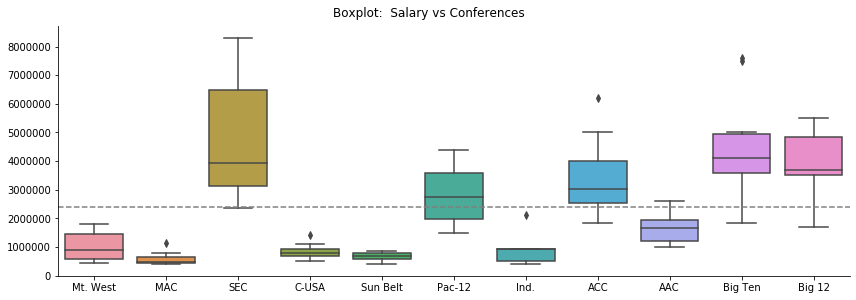

In [43]:
Salary_avg=mdf['SchoolPay'].mean()
m=sns.catplot(kind='box', y='SchoolPay', x='Conference', dodge=False,
            hue='Conference', data=mdf, height= 4, aspect= 3, );
m.set_axis_labels("Conference", "Salary"); 
m.fig.suptitle("Boxplot:  Salary vs Conferences" , y=1.03);
m.map(plt.axhline, y=Salary_avg, ls='--', c='grey');

#### Boxplot: bonus by conferences

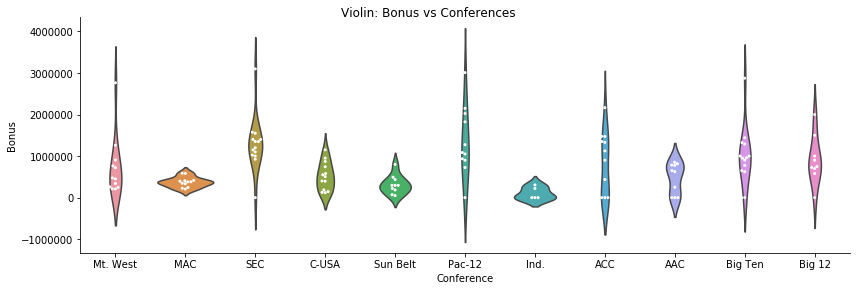

In [44]:
g = sns.catplot(x="Conference", y="Bonus", kind="violin", inner=None, data=mdf, height= 4, dodge=False,
            aspect= 3)
sns.swarmplot(x="Conference", y="Bonus", color="w", size=3, data=mdf, ax=g.ax);
g.set_axis_labels("Conference", "Bonus"); 
g.fig.suptitle("Violin: Bonus vs Conferences" , y=1);

#### Boxplot: GSR by conferences

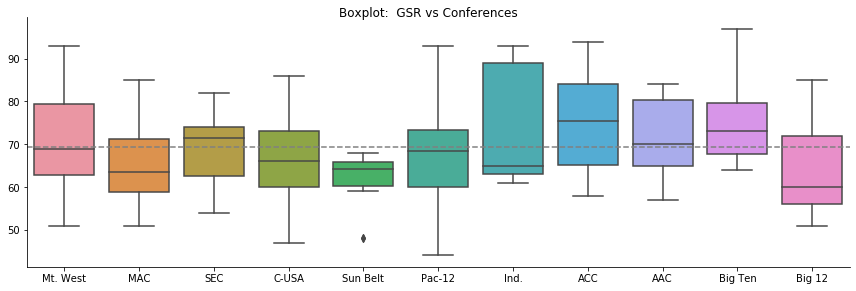

In [45]:
GSR_avg=mdf['GSR'].mean()
m=sns.catplot(kind='box', y='GSR', x='Conference', dodge=False,
            hue='Conference', data=mdf, height= 4, aspect= 3, );
m.set_axis_labels("Conference", "GSR"); 
m.fig.suptitle("Boxplot:  GSR vs Conferences" , y=1);
m.map(plt.axhline, y=GSR_avg, ls='--', c='grey');

#### Boxplot: Buyout by conferences

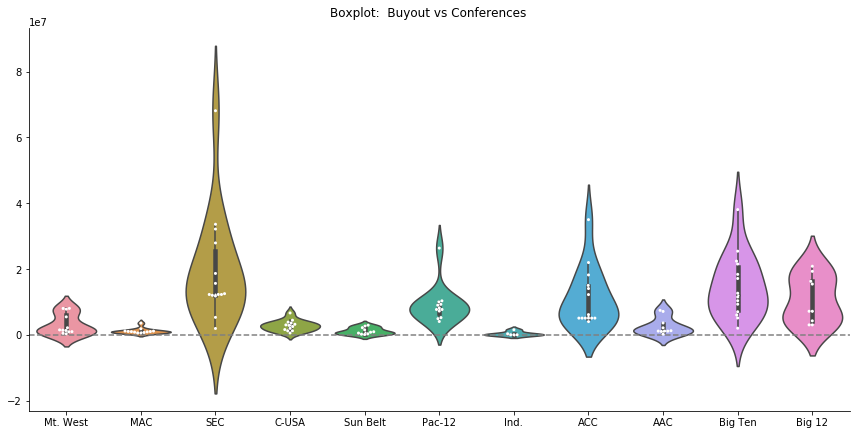

In [46]:
m=sns.catplot(kind='violin', y='Buyout', x='Conference', dodge=False,
            hue='Conference', data=mdf, height= 6, aspect= 2, );
sns.swarmplot(x="Conference", y="Buyout", color="w", size=3, data=mdf, ax=m.ax);
m.set_axis_labels("Conference", "Buyout"); 
m.fig.suptitle("Boxplot:  Buyout vs Conferences" , y=1);
m.map(plt.axhline, y=0, ls='--', c='grey');

#### Boxplot: PF by conferences

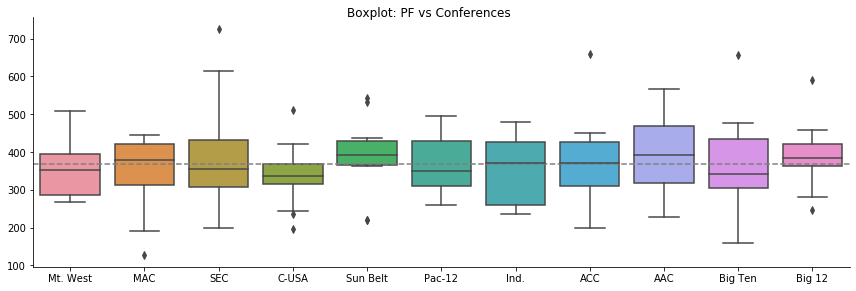

In [47]:
PF_avg=mdf['PF'].mean()
m=sns.catplot(kind='box', y='PF', x='Conference', dodge=False,
            hue='Conference', data=mdf, height= 4, aspect= 3, );
m.set_axis_labels("Conference", "GSR"); 
m.fig.suptitle("Boxplot: PF vs Conferences" , y=1);
m.map(plt.axhline, y=PF_avg, ls='--', c='grey');

#### Correlation heatmap

In [48]:
corr = mdf.corr()
corr

,SchoolPay,TotalPay,Bonus,BonusPaid,Buyout,SuccessRate,GSR,FGR,Conference_W,Conference_L,Overall_W,Overall_L,PF,PA,Capacity
SchoolPay,1.000000,0.999692,0.359169,0.384470,0.828652,0.069633,0.200393,0.166008,0.300482,-0.103650,0.330460,-0.351890,0.313746,-0.480418,0.816973
TotalPay,0.999692,1.000000,0.362884,0.385369,0.831014,0.069175,0.199442,0.165928,0.301016,-0.103787,0.331799,-0.352732,0.316529,-0.479770,0.817344
Bonus,0.359169,0.362884,1.000000,0.405547,0.393063,-0.099261,-0.169144,-0.116699,0.096399,0.099637,0.116136,-0.116085,0.070814,-0.178738,0.411378
BonusPaid,0.384470,0.385369,0.405547,1.000000,0.385485,0.095538,0.059079,0.110349,0.215685,-0.139474,0.238566,-0.245364,0.201042,-0.298496,0.301907
Buyout,0.828652,0.831014,0.393063,0.385485,1.000000,-0.009828,0.100818,0.101994,0.264253,-0.104591,0.280023,-0.288320,0.270156,-0.381569,0.681479
SuccessRate,0.069633,0.069175,-0.099261,0.095538,-0.009828,1.000000,0.022176,-0.003980,0.127892,-0.084508,0.098077,-0.077458,0.097196,-0.130992,0.116164
GSR,0.200393,0.199442,-0.169144,0.059079,0.100818,0.022176,1.000000,0.823454,0.099654,-0.153156,0.155172,-0.188815,0.058057,-0.280880,0.106596
FGR,0.166008,0.165928,-0.116699,0.110349,0.101994,-0.003980,0.823454,1.000000,-0.026133,0.053077,-0.006295,-0.024466,-0.072132,-0.183267,0.040204
Conference_W,0.300482,0.301016,0.096399,0.215685,0.264253,0.127892,0.099654,-0.026133,1.000000,-0.720734,0.878885,-0.862821,0.735473,-0.532342,0.288281
Conference_L,-0.103650,-0.103787,0.099637,-0.139474,-0.104591,-0.084508,-0.153156,0.053077,-0.720734,1.000000,-0.802643,0.777149,-0.704783,0.387535,-0.128921


In [49]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 210, as_cmap=True)

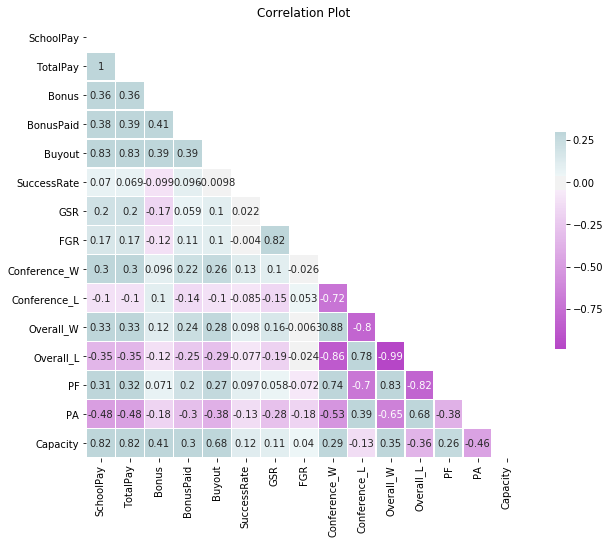

In [50]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,8))
hm=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Plot')
plt.show()

Because we set 'SchoolPay' as the response variable, we need to look at the relationship between 'SchoolPay' and others.  
Both variable, 'Capacity' and 'Buyout', have high correlation with 'SchoolPay'.
'Conference_W', 'Overall_W', 'PF' have positive correlations which make sense.
'PA' and 'Overall_L' have negative correlations which make sense as well.
'TotalPay' is excluded since it is driven from 'SchoolPay'.  
'Bonus' and 'BonusPaid' have many missing values. Thus, a re-engineered variable, 'SuccessRate' is added to predict Salary.  
Since 'FGR' is not fully provided, we will use 'GSR' instead.  
To sum up, there are 10 numerical variables, 'Capacity', 'Buyout', 'GSR' and 'SuccessRate','Conference_W', 'Overall_W', 'PF', 'PA', 'Conference_W' and 'Overall_L' that we are going to use to predict Salary.

In [51]:
mdf.pivot_table(values ='PF', index =['State'], columns = ['Conference'], aggfunc = np.sum)

Conference,AAC,ACC,Big 12,Big Ten,C-USA,Ind.,MAC,Mt. West,Pac-12,SEC,Sun Belt
State,,,,,,,,,,,
AL,NaN,NaN,NaN,NaN,324.0,NaN,NaN,NaN,NaN,1046.0,406.0
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,438.0
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645.0,NaN,NaN
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997.0,1278.0,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,282.0,NaN,NaN
CT,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL,814.0,697.0,NaN,NaN,854.0,NaN,NaN,NaN,NaN,432.0,NaN
GA,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0,366.0
HI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508.0,NaN,NaN,NaN


In [52]:
# examine descriptive statistics and frequency tables for quantitative variables in model
#print(mdf.describe())

mdf.pivot_table(values ='Overall_W', index =['State'], columns = ['Conference'], aggfunc = np.sum)


Conference,AAC,ACC,Big 12,Big Ten,C-USA,Ind.,MAC,Mt. West,Pac-12,SEC,Sun Belt
State,,,,,,,,,,,
AL,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,20.0,5.0
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,24.0,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,5.0,NaN,NaN
CT,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL,14.0,12.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,11.0,NaN
GA,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.0
HI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


## Model selection

In [53]:
mdf.columns

Index(['School', 'Conference', 'Team', 'City', 'State', 'Type', 'Coach',
       'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout', 'SuccessRate',
       'GSR', 'FGR', 'Conference_W', 'Conference_L', 'Overall_W', 'Overall_L',
       'PF', 'PA', 'Streak', 'Stadium', 'Capacity'],
      dtype='object')

##### Split the dataset into training set and testing set

In [54]:
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from scipy.stats import uniform  # for training-and-test split

# employ training-and-test regimen for model validation
np.random.seed(1234)
mdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(mdf))
mdf_train = mdf[mdf['runiform'] >= 0.33]
mdf_test = mdf[mdf['runiform'] < 0.33]
# check training data frame
print('\nmdf_train data frame (rows, columns): ',mdf_train.shape)
print(mdf_train.head())
# check test data frame
print('\nmdf_test data frame (rows, columns): ',mdf_test.shape)
print(mdf_test.head())

C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)



mdf_train data frame (rows, columns):  (90, 25)
                                School Conference  \
1                  University of Akron        MAC   
2                University of Alabama        SEC   
3  University of Alabama at Birmingham      C-USA   
4         Appalachian State University   Sun Belt   
7               University of Arkansas        SEC   

                             Team          City State   Type  \
1                            Zips         Akron    OH  State   
2                    Crimson Tide    Tuscaloosa    AL  State   
3                         Blazers    Birmingham    AL  State   
4                    Mountaineers         Boone    NC  State   
7  Razorbacks and Razorback women  Fayetteville    AR  State   

               Coach  SchoolPay   TotalPay      Bonus  BonusPaid      Buyout  \
1       Terry Bowden   411000.0   412500.0   225000.0    50000.0    688500.0   
2         Nick Saban  8307000.0  8307000.0  1100000.0   500000.0  33600000.0   
3      

#### Model 1:  SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity
(with hold-out set)

In [55]:
# specify a model
my_model = str('SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = mdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
mdf_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
mdf_test['predict_attend'] = train_model_fit.predict(mdf_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     47.05
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           8.42e-32
Time:                        10:47:31   Log-Likelihood:                -1304.0
No. Observations:                  89   AIC:                             2644.
Df Residuals:                      71   BIC:                             2689.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.66

C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


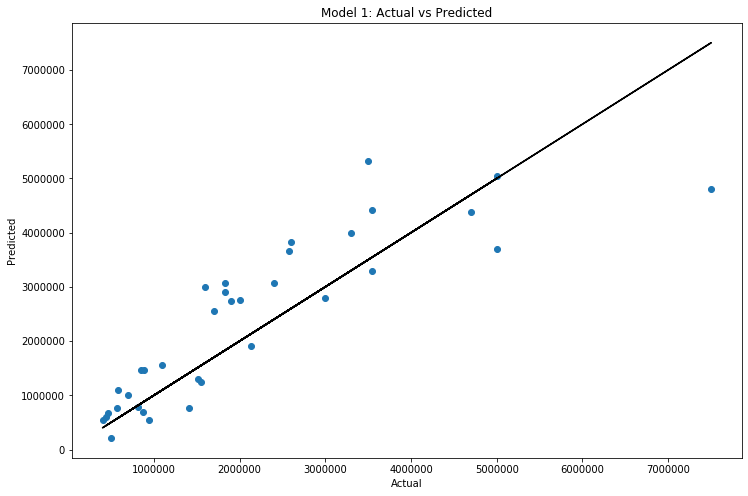

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(x=mdf_test['SchoolPay'], y=mdf_test['predict_attend'])
plt.title("Model 1: Actual vs Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(mdf_test['SchoolPay'],mdf_test['SchoolPay'],'k-');  # add an identical line

#### Model 1:  SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity
(with complete dataset)

In [57]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(mdf_test['SchoolPay'].corr(mdf_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the response variable
my_model_fit = smf.ols(my_model, data = mdf).fit()
print(my_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.741
                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     51.72
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.27e-43
Time:                        10:47:31   Log-Likelihood:                -1828.7
No. Observations:                 124   AIC:                             3693.
Df Residuals:                     106   BIC:                             3744.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

#### Model 2:  SchoolPay ~  Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity
(with hold-out set)

In [58]:
# specify a model
my_model = str('SchoolPay ~ Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = mdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
mdf_train['predict_attend2'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
mdf_test['predict_attend2'] = train_model_fit.predict(mdf_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     64.71
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.57e-30
Time:                        10:47:32   Log-Likelihood:                -1331.6
No. Observations:                  89   AIC:                             2679.
Df Residuals:                      81   BIC:                             2699.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.027e+06   6.85e+05     -4.417   

C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


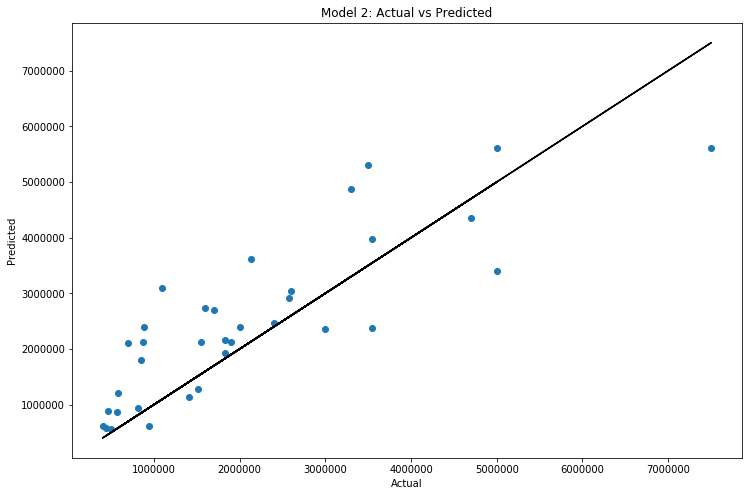

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(x=mdf_test['SchoolPay'], y=mdf_test['predict_attend2'])
plt.title("Model 2: Actual vs Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(mdf_test['SchoolPay'],mdf_test['SchoolPay'],'k-');  # add an identical line

#### Model 2:  SchoolPay ~  Buyout + SuccessRate + GSR + Conference_W + Overall_W + PF + Capacity
(with complete dataset)

In [60]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(mdf_test['SchoolPay'].corr(mdf_test['predict_attend2']),2),3))

# use the full data set to obtain an estimate of the response variable
my_model_fit = smf.ols(my_model, data = mdf).fit()
print(my_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.704
                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     76.34
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.92e-40
Time:                        10:47:32   Log-Likelihood:                -1860.0
No. Observations:                 124   AIC:                             3736.
Df Residuals:                     116   BIC:                             3759.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

#### Model 3: SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Capacity + Conference_W + Conference_L + Overall_W + Overall_L + PF + PA  
(with hold-out set)

In [61]:
# specify a model
my_model = str('SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Capacity + Conference_W + Conference_L + Overall_W + Overall_L + PF + PA')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = mdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
mdf_train['predict_attend3'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
mdf_test['predict_attend3'] = train_model_fit.predict(mdf_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     43.79
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           4.79e-31
Time:                        10:47:32   Log-Likelihood:                -1301.2
No. Observations:                  89   AIC:                             2642.
Df Residuals:                      69   BIC:                             2692.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.37

C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\wubingje\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


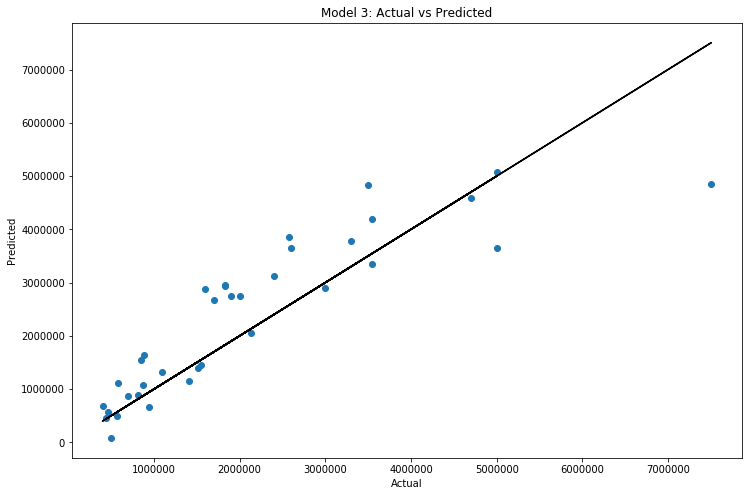

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(x=mdf_test['SchoolPay'], y=mdf_test['predict_attend3'])
plt.title("Model 3: Actual vs Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(mdf_test['SchoolPay'],mdf_test['SchoolPay'],'k-');  # add an identical line

#### Model 3: SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Capacity + Conference_W + Conference_L + Overall_W + Overall_L + PF + PA  
(with complete dataset)

In [63]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(mdf_test['SchoolPay'].corr(mdf_test['predict_attend3']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = mdf).fit()
print(my_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.771
                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     49.28
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.75e-43
Time:                        10:47:33   Log-Likelihood:                -1824.1
No. Observations:                 124   AIC:                             3688.
Df Residuals:                     104   BIC:                             3745.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

#### Final Model :
SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Capacity + Conference_W + Conference_L + Overall_W + Overall_L + PF + PA 

In [64]:
# specify a model 
my_model = str('SchoolPay ~ Conference + Buyout + SuccessRate + GSR + Capacity + Conference_W + Conference_L + Overall_W + Overall_L + PF + PA')

# use the full data set to obtain an estimate of the response value
my_final_model_fit = smf.ols(my_model, data = mdf).fit()
print(my_final_model_fit.summary())
mdf['RecommendedSalary']=my_final_model_fit.fittedvalues

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     49.28
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.75e-43
Time:                        10:47:33   Log-Likelihood:                -1824.1
No. Observations:                 124   AIC:                             3688.
Df Residuals:                     104   BIC:                             3745.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.52

The median of the residual: 6794.519329593517
The Q1 of the residual: -392632.14696209924
The Q3 of the residual: 309400.1770766116


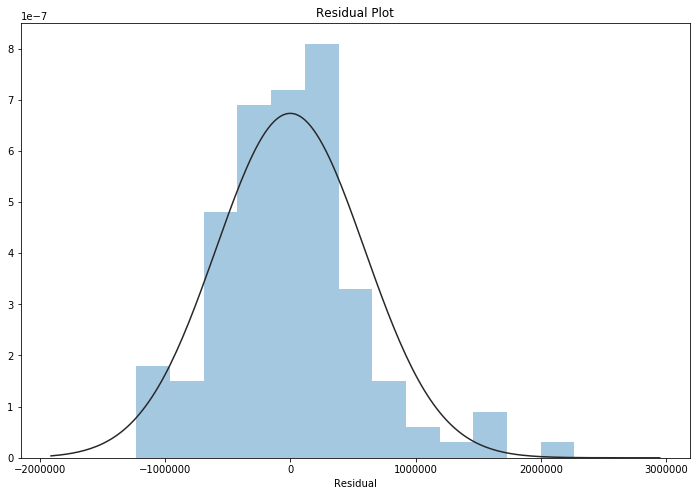

In [65]:
# Residual Plot
residual=my_final_model_fit.resid
from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.distplot(pd.Series(residual, name="Residual"), fit=norm, kde=False);
plt.title("Residual Plot");
print(f'The median of the residual: {residual.median()}')
print(f'The Q1 of the residual: {residual.quantile(q=0.25)}')
print(f'The Q3 of the residual: {residual.quantile(q=0.75)}')

In [66]:
# Omnibus test of the normality of residuals
from scipy import stats
(K2, p) = stats.normaltest(residual)
print('Omnibus: {0}, p = {1}'.format(K2, p))

Omnibus: 17.963534579044662, p = 0.0001256805372196267


## Questions

**What is the recommended salary for the Syracuse football coach?**

In [67]:
mdf.loc[mdf['School'].str.contains('Syracuse'),]

,School,Conference,Team,City,State,Type,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,Buyout,SuccessRate,GSR,FGR,Conference_W,Conference_L,Overall_W,Overall_L,PF,PA,Streak,Stadium,Capacity,runiform,RecommendedSalary
98,Syracuse University,ACC,Orange,Syracuse,NY,Private/Methodist,Dino Babers,2401206.0,2401206.0,0.0,0.0,5062500.0,0.0,77.0,64.0,2,6,5,7,339,368,Won 1,Carrier Dome,49250.0,0.057116,2.743825e+06


In [68]:
# The recommended salary for the Syracuse football coach:
SyracuseCoach=mdf.loc[mdf['School'].str.contains('Syracuse'),'RecommendedSalary']
print('The recommended salary for the Syracuse football coach: ${}'.format(int(SyracuseCoach)))

The recommended salary for the Syracuse football coach: $2743824


**What would his salary be if we were still in the Big East? What if we went to the Big Ten?**
 

In [69]:
# What would his salary be if we were still in the Big East?
print('Since we dont have School in the Big East conference in our dataset, \
\nwe cannot correctly predict the coach salary in the Big East conference. \n')
print('The salary for the Syracuse football coach in the Big East conference is approximately about: \
${}'.format(int(SyracuseCoach)-int(8.192e+05)))

Since we dont have School in the Big East conference in our dataset, 
we cannot correctly predict the coach salary in the Big East conference. 

The salary for the Syracuse football coach in the Big East conference is approximately about: $1924624


In [70]:
# What if we went to the Big Ten?
SyracuseBigTen=mdf.loc[mdf['School'].str.contains('Syracuse'),].copy()
SyracuseBigTen['Conference']='Big Ten'
SyracuseBigTen
SyracuseBigTenSalary=int(my_final_model_fit.predict(SyracuseBigTen))
print('The salary for the Syracuse football coach in the Big Ten conference: \
${}'.format(int(SyracuseBigTenSalary)))

The salary for the Syracuse football coach in the Big Ten conference: $2865830


**What schools did we drop from our data, and why?** 

There are four records having missing values for 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout'.  
Because we use the 'SchoolPay' as out response variable and those four records could not contribute on 'SchoolPay' prediction, the 4 schools (Baylor, Brigham Young, Rice, Southern Methodist) were dropped from the dataset.

**What effect does graduation rate have on the projected salary?**

Each unit of the graduation rate can contribute the increase of $7,833.8737 on projected salary.

**How good is our model?** 

The residuals median is a bit far from zero and the absolute value of Q1 and Q3 are not similar indicating that there is a skewness in the residuals. The residual distribution is a bit skewed to the right (Not symmetrically distributed). It indicates that the result of the regression analysis could be inaccurate. 

The null hypothesis for the Omnibus test for the distribution of the residual is normal. The p-value of the test is statistically significant and shows the evidence that the residuals are not normally distributed about zero. 

The initial Omnibus test for the regression equation has F-statistic=49.28 and p-value < 0.001. The null hypothesis of the R-squared is equal to zero. We reject the null hypothesis since the p-value for the F-test is extremely small. Thus, the overall R-squared is significant. Because we are using multiple linear regression model, we need to use adjusted R-squared to have unbiased estimate instead of overall R-squared. The adjusted R-squared shows independent variables are accounted for about 88.2% of variability in dependent variable.

**What is the single biggest impact on salary size?**

Being in the Big 12 conference will be the biggest impact on the salary prediction. If a school is in the Big 12 conference, it can increase the projected salary by $1,196,000.

## Conclusion

The salary can be projected through several datasets, such as coaches' payment information, school graduation rate, stadium size, team performance. The model was built with an overall good perfomance and could explain 88.2% variability in the projected salary. More data or accurate data could increase the performance of the model. The donation information was not used in this lab. It could be combined into the dataset and build a better model in the future. 